In [97]:
import cv2 as cv
import matplotlib.pyplot as plt

In [98]:
cat=cv.imread('cats/cat.jpg')

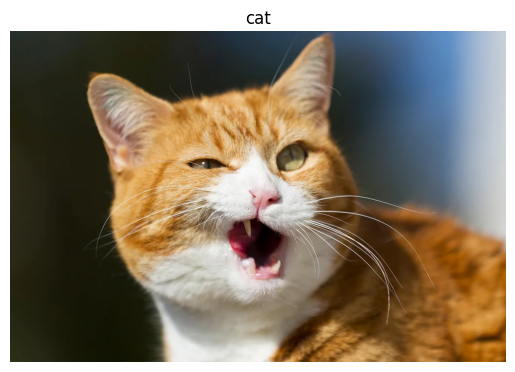

In [99]:

def imshow(title,image):
    image=cv.cvtColor(image, cv.COLOR_BGR2RGB)  # Convert BGR to RGB
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')  # Hide axes
    plt.show()
imshow('cat',cat)

# Image Processing with OpenCV

This notebook demonstrates various image processing techniques using OpenCV. It includes operations such as color space conversion, blurring, edge detection, thresholding, and contour detection. Additionally, it showcases the use of Haar cascades for object detection, specifically for detecting cat faces in images.

The following variables are used throughout the notebook:

- **cat**: Original image of a cat.
- **cat_gray**: Grayscale version of the cat image.
- **cat_hsv**: HSV color space representation of the cat image.
- **cat_lab**: LAB color space representation of the cat image.
- **blur**: Blurred version of the cat image using Gaussian blur.
- **gray**: Another grayscale version of the cat image.
- **canny**: Edges detected using the Canny edge detection algorithm.
- **thresh**: Binary thresholded image.
- **contours**: Detected contours in the image.
- **hierarchies**: Hierarchical representation of contours.
- **blank**: Blank canvas used for drawing contours.
- **haar_cascade**: Haar cascade classifier for detecting cat faces.
- **cat_rects**: Detected rectangles around cat faces.

Each step in the notebook builds upon the previous steps, showcasing the power of OpenCV for image analysis and manipulation.

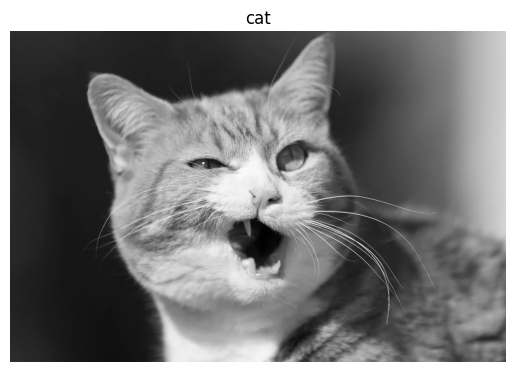

In [100]:
cat_gray = cv.cvtColor(cat, cv.COLOR_BGR2GRAY)
imshow('cat',cat_gray)

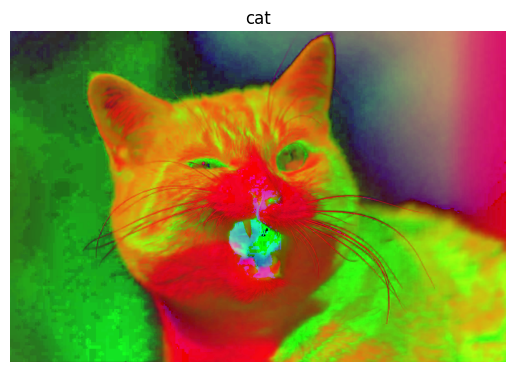

In [101]:
cat_hsv = cv.cvtColor(cat, cv.COLOR_BGR2HSV)
imshow('cat',cat_hsv)

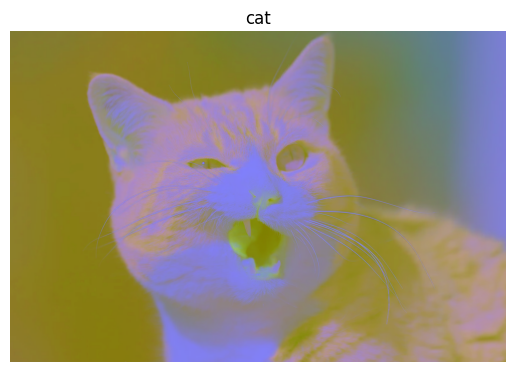

In [102]:
cat_lab = cv.cvtColor(cat, cv.COLOR_BGR2Lab)
imshow('cat',cat_lab)

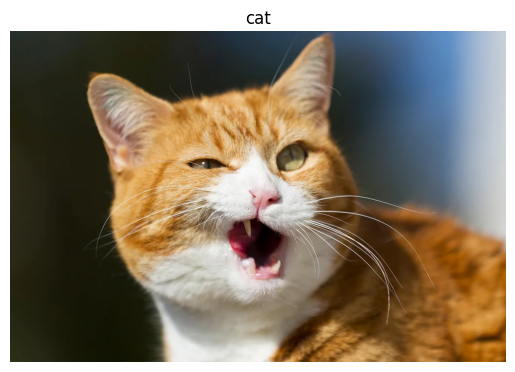

In [103]:
imshow('cat',cat)

# contours



In [104]:
import numpy as np


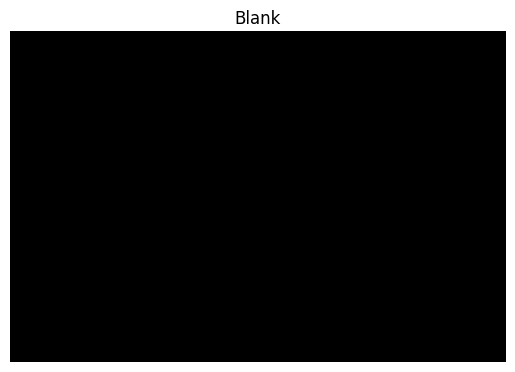

In [105]:

blank = np.zeros(cat.shape, dtype='uint8')
imshow('Blank', blank)

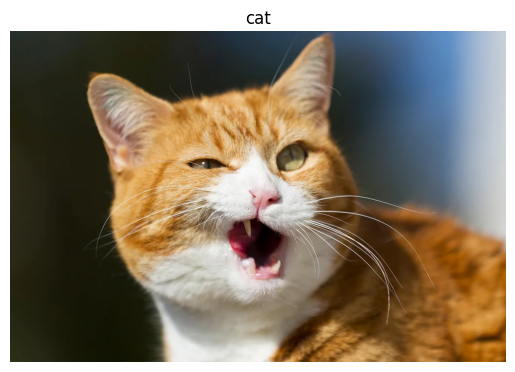

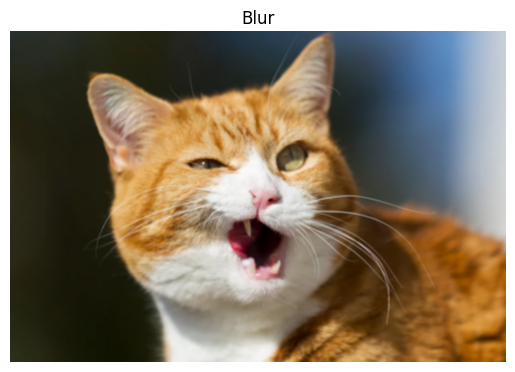

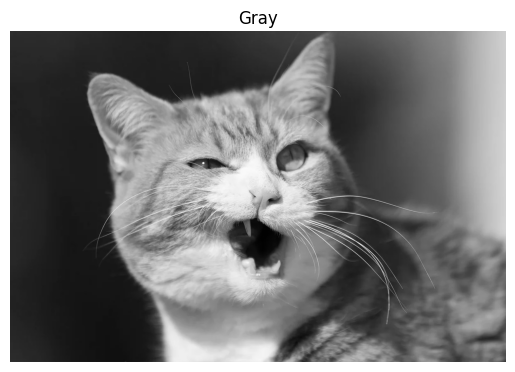

In [106]:

imshow('cat', cat)
blur = cv.GaussianBlur(cat, (5,5), cv.BORDER_DEFAULT)
imshow('Blur', blur)

gray = cv.cvtColor(cat, cv.COLOR_BGR2GRAY)
imshow('Gray', gray)


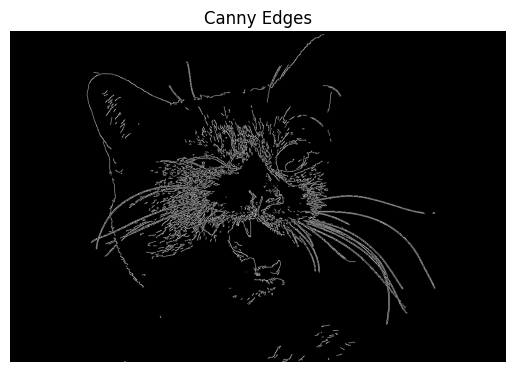

In [107]:
canny = cv.Canny(cat, 125, 175)
imshow('Canny Edges', canny)


# contours
In this section, we explore contour detection and visualization techniques using OpenCV. Contours are useful for shape analysis, object detection, and recognition. We utilize various preprocessing steps such as blurring, edge detection, and thresholding to extract contours from the image. The detected contours are then drawn on a blank canvas for visualization.
CHAIN_APPROX_SIMPLE removes all redundant points and compresses the contour, saving only the essential points needed to represent the shape.

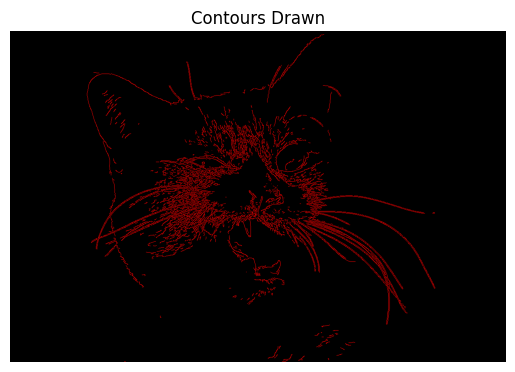

1721 contour(s) found!


In [108]:
contours, hierarchies = cv.findContours(canny, cv.RETR_LIST,cv.CHAIN_APPROX_SIMPLE)

cv.drawContours(blank, contours, -1, (0,0,255), 1)
imshow('Contours Drawn', blank)
print(f'{len(contours)} contour(s) found!')

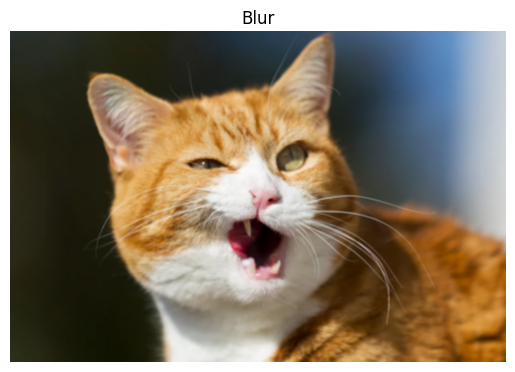

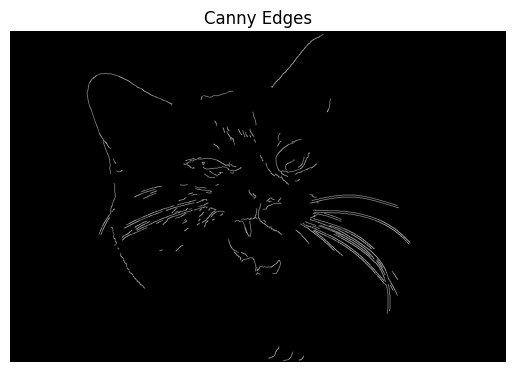

181 contour(s) found!


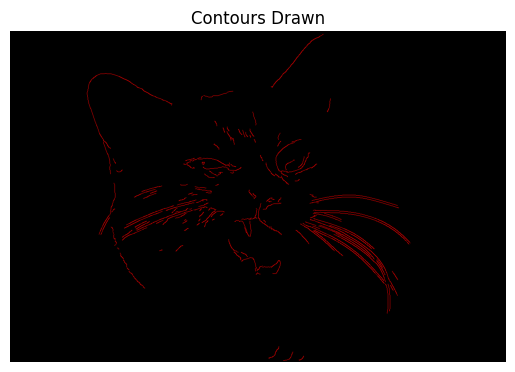

In [109]:
blur = cv.GaussianBlur(cat, (5,5), cv.BORDER_DEFAULT)
imshow('Blur', blur)

canny = cv.Canny(blur, 125, 175)
imshow('Canny Edges', canny)
contours, hierarchies = cv.findContours(canny, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)


print(f'{len(contours)} contour(s) found!')
blank = np.zeros(cat.shape, dtype='uint8')

cv.drawContours(blank, contours, -1, (0,0,255), 1)
imshow('Contours Drawn', blank)

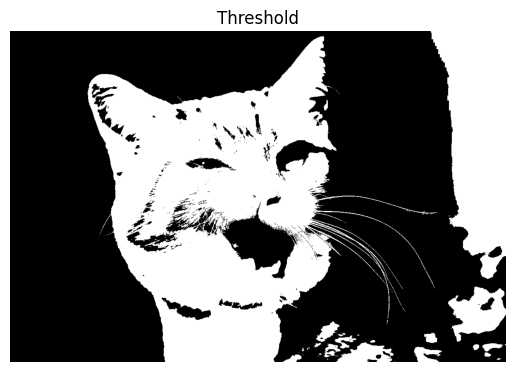

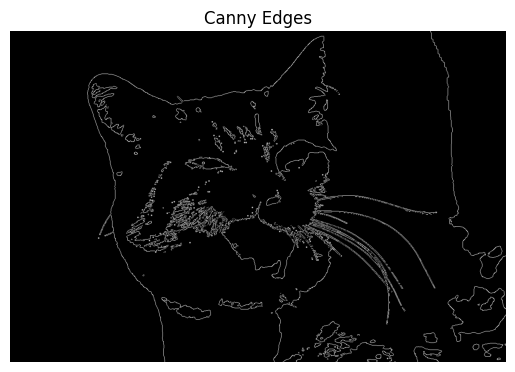

1850 contour(s) found!


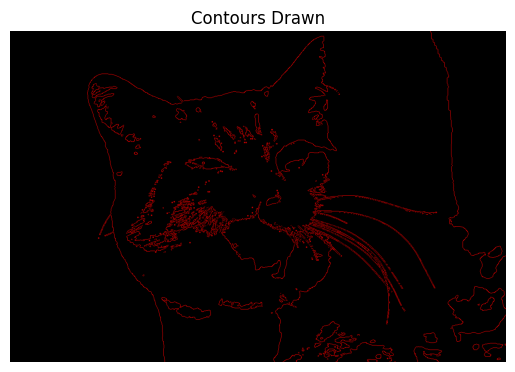

In [110]:
blank = np.zeros(cat.shape, dtype='uint8')

ret,thresh = cv.threshold(gray, 125, 255, cv.THRESH_BINARY)
imshow('Threshold', thresh)
canny = cv.Canny(thresh, 125, 175)
imshow('Canny Edges', canny)
contours, hierarchies = cv.findContours(canny, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)


print(f'{len(contours)} contour(s) found!')
cv.drawContours(blank, contours, -1, (0,0,255), 1)
imshow('Contours Drawn', blank)

# is it a cat
let the machine answer

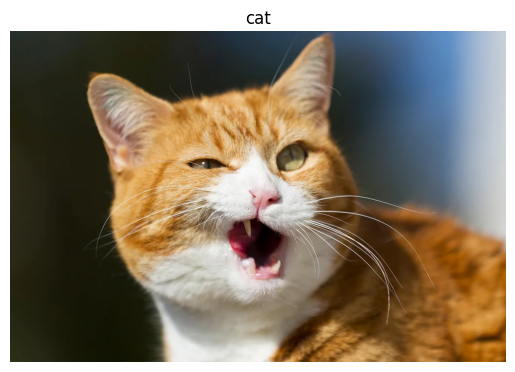

In [111]:
imshow('cat', cat)

In [116]:
haar_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalcatface.xml')
cat_rects = haar_cascade.detectMultiScale(cat, scaleFactor=1.1, minNeighbors=3)
print(f'number of faces detected    : {len(cat_rects)}')
for (x,y,w,h) in cat_rects:
    cv.rectangle(cat, (x,y), (x+w, y+h), (0,255,0), 2) 

number of faces detected    : 1


In [113]:
cat=cv.imread(r"C:\Users\dredr\OneDrive\Desktop\dsa\9+30 to 11\code\intro+to+opencv\cats\cat1.jpg")

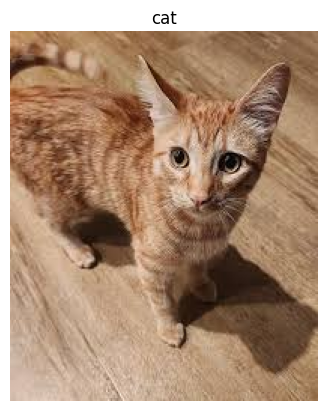

In [114]:
imshow('cat',cat)


# https://github.com/opencv/opencv/tree/master/data/haarcascades

number of faces detected    : 1
[[91 54 77 77]]


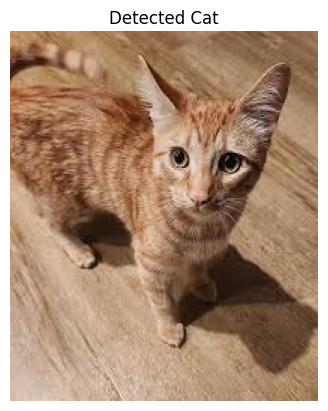

In [115]:
haar_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalcatface.xml')
cat_rects = haar_cascade.detectMultiScale(cat, scaleFactor=1.1, minNeighbors=3)
print(f'number of faces detected    : {len(cat_rects)}')
print(cat_rects)
'''cv.circle(cat, (91,54), 1, (0,0,255), thickness=2)'''
'''cv.circle(cat, (168,131), 1, (0,0,255), thickness=2)'''
'''cv.line(cat, (91,54), (167,131), (255,255,0), thickness=7)'''
'''for (x,y,w,h) in cat_rects:
    cv.rectangle(cat, (x,y), (x+w, y+h), (0,255,0), 2) '''

imshow('Detected Cat', cat)

# Now do a human identifier
